In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import nltk# FOR TEXT PROCESSING
from wordcloud import WordCloud,STOPWORDS
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import re
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer,TfidfVectorizer#TEXT PROCESSING
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes  import BernoulliNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
nltk.download('stopwords')
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Simeon\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
df = pd.read_csv('sentiment-emotion-labelled_Dell_tweets.csv')
df.head()

,Unnamed: 0,Datetime,Tweet Id,Text,Username,sentiment,sentiment_score,emotion,emotion_score
0,0,2022-09-30 23:29:15+00:00,1575991191170342912,@Logitech @apple @Google @Microsoft @Dell @Len...,ManjuSreedaran,neutral,0.853283,anticipation,0.587121
1,1,2022-09-30 21:46:35+00:00,1575965354425131008,@MK_habit_addict @official_stier @MortalKombat...,MiKeMcDnet,neutral,0.519470,joy,0.886913
2,2,2022-09-30 21:18:02+00:00,1575958171423752203,"As @CRN celebrates its 40th anniversary, Bob F...",jfollett,positive,0.763791,joy,0.960347
3,3,2022-09-30 20:05:24+00:00,1575939891485032450,@dell your customer service is horrible especi...,daveccarr,negative,0.954023,anger,0.983203
4,4,2022-09-30 20:03:17+00:00,1575939359160750080,@zacokalo @Dell @DellCares @Dell give the man ...,heycamella,neutral,0.529170,anger,0.776124


In [19]:
df.shape

(24970, 9)

In [20]:
df.isnull().sum()

Unnamed: 0         0
Datetime           0
Tweet Id           0
Text               0
Username           0
sentiment          0
sentiment_score    0
emotion            0
emotion_score      0
dtype: int64

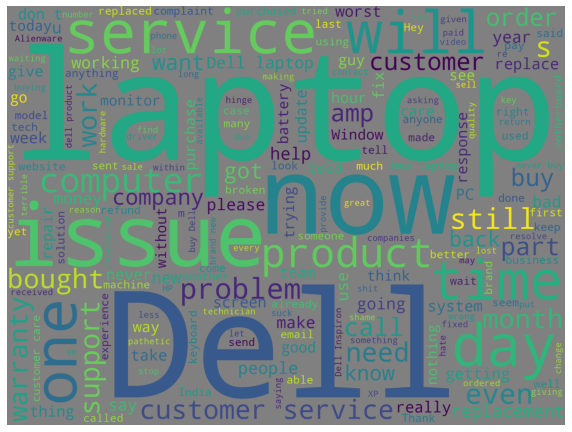

In [21]:
new_data = df[df['sentiment'] == 'negative']
words = ' '.join(new_data['Text'])
cleaned_word = ' '.join([word for word in words.split()
                    if 'http' not in word and  not word.startswith('@')
                    and word !='RT'])
wordcloud = WordCloud(stopwords =STOPWORDS,
                      background_color ='gray',
                      width = 2000,
                      height=1500).generate(cleaned_word)
plt.figure(1,figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

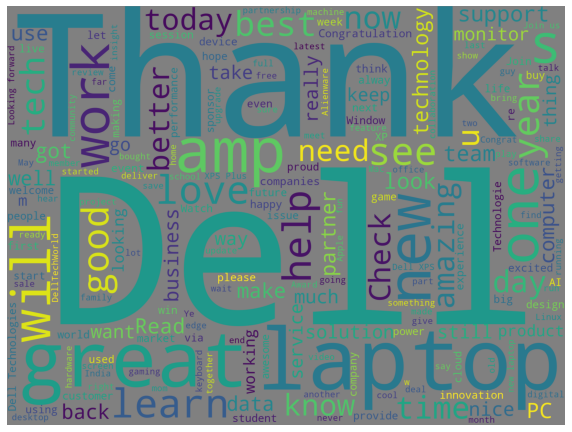

In [22]:
new_data = df[df['sentiment'] == 'positive']
words = ' '.join(new_data['Text'])
cleaned_word = ' '.join([word for word in words.split()
                    if 'http' not in word and  not word.startswith('@')
                    and word !='RT'])
wordcloud = WordCloud(stopwords =STOPWORDS,
                      background_color ='gray',
                      width = 2000,
                      height=1500).generate(cleaned_word)
plt.figure(1,figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

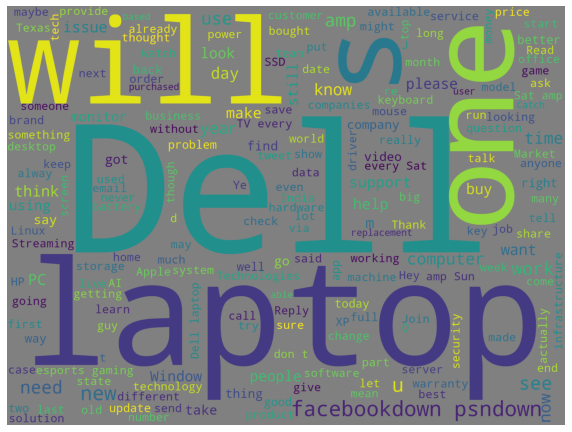

In [23]:
new_data = df[df['sentiment'] == 'neutral']
words = ' '.join(new_data['Text'])
cleaned_word = ' '.join([word for word in words.split()
                    if 'http' not in word and  not word.startswith('@')
                    and word !='RT'])
wordcloud = WordCloud(stopwords =STOPWORDS,
                      background_color ='gray',
                      width = 2000,
                      height=1500).generate(cleaned_word)
plt.figure(1,figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [24]:
df['sentiment'].value_counts()

negative    10556
positive     7366
neutral      7048
Name: sentiment, dtype: int64

In [25]:
text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"
def preprocess(x, stem =False):
    x = re.sub(text_cleaning_re,' ',str(x).lower()).strip()
    tokens = []
    for token in x.split('\n'):
        if token not in stop_words:
            if stem:
                tokens.append(SnowballStemmer.stem(token))
            else:
                tokens.append(token)
            return ' '.join(tokens)
df.Text = df.Text.apply(lambda x:preprocess(x))

In [26]:
df

,Unnamed: 0,Datetime,Tweet Id,Text,Username,sentiment,sentiment_score,emotion,emotion_score
0,0,2022-09-30 23:29:15+00:00,1575991191170342912,apple google microsoft dell lenovo whatif qwer...,ManjuSreedaran,neutral,0.853283,anticipation,0.587121
1,1,2022-09-30 21:46:35+00:00,1575965354425131008,official stier mortalkombat newzealand she s g...,MiKeMcDnet,neutral,0.519470,joy,0.886913
2,2,2022-09-30 21:18:02+00:00,1575958171423752203,as crn celebrates its 40th anniversary bob fal...,jfollett,positive,0.763791,joy,0.960347
3,3,2022-09-30 20:05:24+00:00,1575939891485032450,your customer service is horrible especially a...,daveccarr,negative,0.954023,anger,0.983203
4,4,2022-09-30 20:03:17+00:00,1575939359160750080,dell dellcares dell give the man what he paid for,heycamella,neutral,0.529170,anger,0.776124
...,...,...,...,...,...,...,...,...,...
24965,24965,2022-01-01 02:02:04+00:00,1477097760931336198,gamersnexus dell i wouldn t even know what to ...,Eodart,negative,0.682981,anger,0.906309
24966,24966,2022-01-01 01:57:34+00:00,1477096631300415496,gamersnexus dell i didn t really leave for the...,Eodart,positive,0.743940,joy,0.951701
24967,24967,2022-01-01 01:36:36+00:00,1477091355629432833,hey joshthefixer here it is 27 4k uhd usb c by...,Corleone250,neutral,0.654463,anticipation,0.471185
24968,24968,2022-01-01 01:31:30+00:00,1477090070830141442,thewolfpena alienware intel intel africa dellt...,MrTwistyyy,neutral,0.794049,anticipation,0.747014


In [28]:
df.isnull().sum()
df.dropna(inplace =True)

In [29]:
x = df.Text
y = df['sentiment']
xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size = 0.20)

In [30]:
clf1 = Pipeline([('count', CountVectorizer()),('transformer', TfidfTransformer()),('model',BernoulliNB())])
clf2 = Pipeline([('count', CountVectorizer()),('transformer', TfidfTransformer()),('model',MLPClassifier(hidden_layer_sizes=(10,10)))])

In [31]:

clf1.fit(xtrain, ytrain)
pred1 = clf1.predict(xtest)
print(classification_report(ytest,pred1))
print(confusion_matrix(ytest,pred1))

              precision    recall  f1-score   support

    negative       0.79      0.87      0.83      2139
     neutral       0.62      0.57      0.59      1380
    positive       0.74      0.69      0.72      1475

    accuracy                           0.73      4994
   macro avg       0.72      0.71      0.71      4994
weighted avg       0.73      0.73      0.73      4994

[[1856  226   57]
 [ 297  783  300]
 [ 203  248 1024]]


In [32]:
clf2.fit(xtrain, ytrain)
pred1 = clf2.predict(xtest)
print(classification_report(ytest,pred1))
print(confusion_matrix(ytest,pred1))

              precision    recall  f1-score   support

    negative       0.80      0.79      0.79      2139
     neutral       0.57      0.59      0.58      1380
    positive       0.69      0.69      0.69      1475

    accuracy                           0.70      4994
   macro avg       0.69      0.69      0.69      4994
weighted avg       0.71      0.70      0.70      4994

[[1681  300  158]
 [ 268  811  301]
 [ 144  309 1022]]
